In [2]:
# 1. 기본 라이브러리 불러오기
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [3]:
def AverageFilter(inp,n):
    mask = np.ones((n,n))/(n**2)
    k = np.uint8((n-1)/2)
    h,w = inp.shape
    
    inp_pad = np.zeros((h+2*k,w+2*k))
    inp_pad[k:h+k,k:w+k] = inp    
    
    out = np.zeros((h+2*k,w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            for x in range(0,n):
                for y in range(0,n):
                    out[i,j] += temp[x,y]*mask[x,y]
    out = out[k:h+k,k:w+k]
    out[out>255] = 255
    out[out<0] = 0

    return np.uint8(out);

In [4]:
def MedianFilter(inp,n):
    k = np.uint8((n-1)/2)
    h,w = inp.shape

    inp_pad = np.zeros((h+2*k,w+2*k))
    inp_pad[k:h+k,k:w+k] = inp    

    out = np.zeros((h+2*k,w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            append_temp = np.array([])
            for x in range(0,n):
                for y in range(0,n):
                    append_temp = np.append(append_temp,temp[x,y])
            sorted_temp = np.sort(append_temp)
            out[i,j] = sorted_temp[n**2//2]

    out = out[k:h+k,k:w+k]

    return np.uint8(out);

In [5]:
def WeightedMedianFilter(inp,n,repeat_cnt):
    mask = np.ones((n,n))
    k = np.uint8((n-1)/2)
    mask[k,k] = repeat_cnt

    inp_pad = np.zeros((h+2*k,w+2*k))
    inp_pad[k:h+k,k:w+k] = inp    

    out = np.zeros((h+2*k,w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            append_temp = np.array([])
            for x in range(0,n):
                for y in range(0,n):
                    for z in range(0,np.uint8(mask[x,y])):
                        append_temp = np.append(append_temp,temp[x,y])
            sorted_temp = np.sort(append_temp)
            out[i,j] = sorted_temp[len(sorted_temp)//2]

    out = out[k:h+k,k:w+k]

    return np.uint8(out);

In [6]:
def MinFilter(inp,n):
    k = np.uint8((n-1)/2)
    h,w = inp.shape

    inp_pad = np.zeros((h+2*k,w+2*k))
    inp_pad[k:h+k,k:w+k] = inp    

    out = np.zeros((h+2*k,w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            out[i,j] = np.min(temp)

    out = out[k:h+k,k:w+k]
    return np.uint8(out);

In [7]:
def MaxFilter(inp,n):
    k = np.uint8((n-1)/2)
    h,w = inp.shape

    inp_pad = np.zeros((h+2*k,w+2*k))
    inp_pad[k:h+k,k:w+k] = inp    

    out = np.zeros((h+2*k,w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            out[i,j] = np.max(temp)

    out = out[k:h+k,k:w+k]
    return np.uint8(out);

In [8]:
# 2. ‘Lenna.png’를 흑백영상(inp)으로 불러오기
inp = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE) # BGR -> RGB
h,w = inp.shape

In [9]:
# User parameter
p = 0.01 # value < 0.05 -> 0, value > (1-0.05) -> 255
n = 3 # mask width

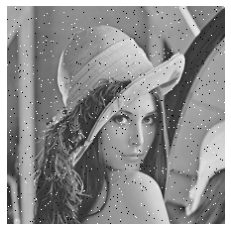

In [10]:
# 3. inp에 salt & pepper 노이즈 첨가하기(inp_noise)
inp_noise = inp.copy()
for i in range(0,h):
    for j in range(0,w):
        temp = np.random.random(1)
        if temp < p:
            inp_noise[i,j] = 0
        elif temp > 1-p:
            inp_noise[i,j] = 255
            
plt.imshow(inp_noise,cmap='gray'); plt.axis('off');

In [11]:
# 4. 다음 필터들을 설계하고, inp_noise에 적용하기
# 평균 필터(Average Filter, Mean Filter) : out1
out1 = AverageFilter(inp_noise,n)

In [12]:
# 중간 값 필터(Median Filter) : out2
out2 = MedianFilter(inp_noise,n)

In [13]:
# 가중 중간 값 필터(Weighted Median Filter) : out3
repeat_cnt = 5
out3 = WeightedMedianFilter(inp_noise,n,repeat_cnt)

In [14]:
# 최소/최대 필터링(Min/Max Filter) : out4, out5
out4 = MinFilter(inp_noise,n)
out5 = MaxFilter(inp_noise,n)

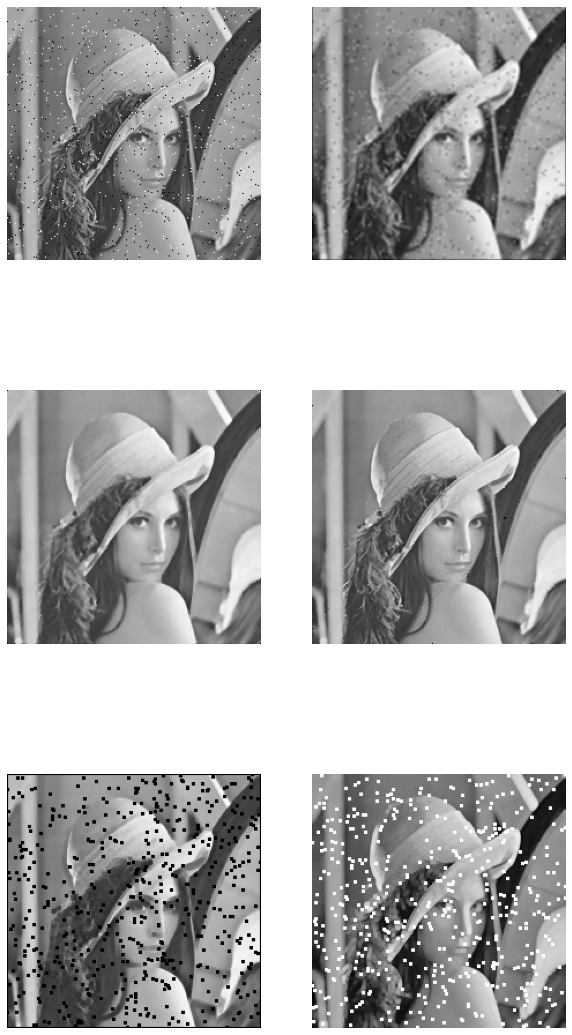

In [15]:
# 5. 결과 출력하기(out1~out5)
plt.figure(figsize=(10,20))
plt.subplot(3,2,1); plt.imshow(inp_noise,cmap='gray'); plt.axis('off');
plt.subplot(3,2,2); plt.imshow(out1,cmap='gray'); plt.axis('off');
plt.subplot(3,2,3); plt.imshow(out2,cmap='gray'); plt.axis('off');
plt.subplot(3,2,4); plt.imshow(out3,cmap='gray'); plt.axis('off');
plt.subplot(3,2,5); plt.imshow(out4,cmap='gray'); plt.axis('off');
plt.subplot(3,2,6); plt.imshow(out5,cmap='gray'); plt.axis('off');